### Importing Required Libraries

In [57]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

### Importing Data

In [58]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

filter_train = ((y_train == 0) | (y_train == 2) | (y_train == 5))
filter_test = ((y_test == 0) | (y_test == 2) | (y_test == 5))

y_train_new = y_train[filter_train]; y_test_new = y_test[filter_test]
x_train_new = x_train[filter_train]; x_test_new = x_test[filter_test];

x_train = x_train_new.reshape(x_train_new.shape[0],-1);  x_test = x_test_new.reshape(x_test_new.shape[0],-1);
y_train = y_train_new.reshape(-1,1); y_test = y_test_new.reshape(-1,1);

In [59]:
y_train[y_train==2] = 1; y_train[y_train==5] = 2
y_test[y_test==2] = 1; y_test[y_test==5] = 2

### Creating and Training Model

In [60]:
class MyLayer(keras.layers.Layer):

        def __init__(self, units=50):
            
            super(MyLayer, self).__init__()
            self.units = units

        def build(self, input_shape):

            self.v = self.add_weight(shape=(input_shape[-1], self.units),
                                     initializer="random_normal",
                                     trainable=True)
            self.w = self.add_weight(shape=(input_shape[-1], self.units),
                                     initializer="random_normal",
                                     trainable=True)
            self.b = self.add_weight(shape=(self.units,),
                                     initializer="random_normal",
                                     trainable=True)

        def call(self, inputs):
            inputs = tf.cast(inputs,tf.float32)
            return tf.matmul(inputs**3, self.v) - tf.matmul(inputs, self.w) + self.b
        
class MyBlock_1(keras.layers.Layer):
    
        def __init__(self):
            super(MyBlock_1, self).__init__()
            self.mylayer = MyLayer(50)

        def call(self, inputs):
            X = self.mylayer(inputs)
            X = tf.nn.sigmoid(X)
            return X

In [61]:
model_1 = keras.models.Sequential([
      MyBlock_1(), 
      MyBlock_1(),
      keras.layers.Dense(3, activation = "softmax")
])

model_2 = keras.models.Sequential([
      keras.layers.Dense(50, activation = "relu"),
      keras.layers.Dense(50, activation = "relu"),
      keras.layers.Dense(3, activation = "softmax")
])

In [62]:
model_1.compile(loss = keras.losses.SparseCategoricalCrossentropy(),
              optimizer = "Adam",
              metrics = ["accuracy"])

model_2.compile(loss = keras.losses.SparseCategoricalCrossentropy(),
              optimizer = "Adam",
              metrics = ["accuracy"])

In [63]:
history_1 = model_1.fit(x_train, y_train, epochs = 50, validation_data = (x_test, y_test), verbose = 2)

Epoch 1/50
541/541 - 4s - loss: 0.5666 - accuracy: 0.8015 - val_loss: nan - val_accuracy: 0.3116 - 4s/epoch - 8ms/step
Epoch 2/50
541/541 - 3s - loss: 0.4445 - accuracy: 0.8274 - val_loss: nan - val_accuracy: 0.3185 - 3s/epoch - 6ms/step
Epoch 3/50
541/541 - 3s - loss: 0.4330 - accuracy: 0.8323 - val_loss: nan - val_accuracy: 0.3030 - 3s/epoch - 6ms/step
Epoch 4/50
541/541 - 3s - loss: 0.4236 - accuracy: 0.8338 - val_loss: nan - val_accuracy: 0.3079 - 3s/epoch - 6ms/step
Epoch 5/50
541/541 - 3s - loss: 0.4146 - accuracy: 0.8388 - val_loss: nan - val_accuracy: 0.3092 - 3s/epoch - 6ms/step
Epoch 6/50
541/541 - 3s - loss: 0.4044 - accuracy: 0.8415 - val_loss: nan - val_accuracy: 0.3127 - 3s/epoch - 6ms/step
Epoch 7/50
541/541 - 3s - loss: 0.3888 - accuracy: 0.8497 - val_loss: nan - val_accuracy: 0.3099 - 3s/epoch - 6ms/step
Epoch 8/50
541/541 - 3s - loss: 0.3734 - accuracy: 0.8563 - val_loss: nan - val_accuracy: 0.3151 - 3s/epoch - 6ms/step
Epoch 9/50
541/541 - 3s - loss: 0.3560 - accurac

In [64]:
history_2 = model_2.fit(x_train, y_train, epochs = 50, validation_data = (x_test, y_test), verbose = 2)

Epoch 1/50
541/541 - 3s - loss: 1.0956 - accuracy: 0.9543 - val_loss: nan - val_accuracy: 0.3371 - 3s/epoch - 6ms/step
Epoch 2/50
541/541 - 3s - loss: 0.2093 - accuracy: 0.9823 - val_loss: nan - val_accuracy: 0.3337 - 3s/epoch - 5ms/step
Epoch 3/50
541/541 - 3s - loss: 0.1594 - accuracy: 0.9856 - val_loss: nan - val_accuracy: 0.3375 - 3s/epoch - 5ms/step
Epoch 4/50
541/541 - 2s - loss: 0.1295 - accuracy: 0.9888 - val_loss: nan - val_accuracy: 0.3351 - 2s/epoch - 5ms/step
Epoch 5/50
541/541 - 3s - loss: 0.0935 - accuracy: 0.9910 - val_loss: nan - val_accuracy: 0.3378 - 3s/epoch - 5ms/step
Epoch 6/50
541/541 - 3s - loss: 0.0907 - accuracy: 0.9908 - val_loss: nan - val_accuracy: 0.3351 - 3s/epoch - 5ms/step
Epoch 7/50
541/541 - 3s - loss: 0.0741 - accuracy: 0.9914 - val_loss: nan - val_accuracy: 0.3261 - 3s/epoch - 5ms/step
Epoch 8/50
541/541 - 2s - loss: 0.0591 - accuracy: 0.9932 - val_loss: nan - val_accuracy: 0.3320 - 2s/epoch - 5ms/step
Epoch 9/50
541/541 - 3s - loss: 0.0755 - accurac

### Plotting Results

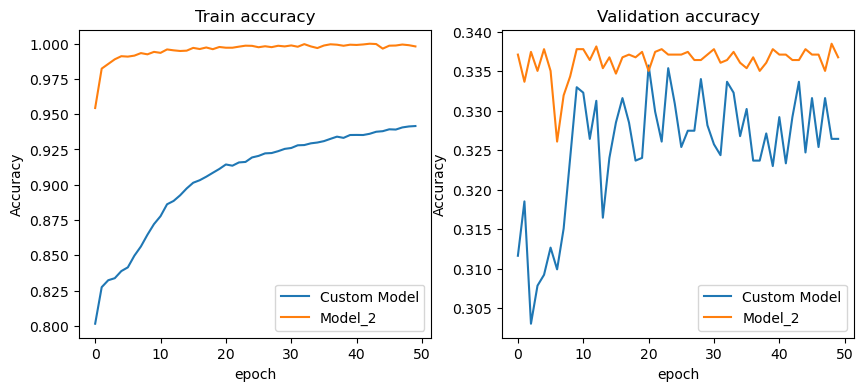

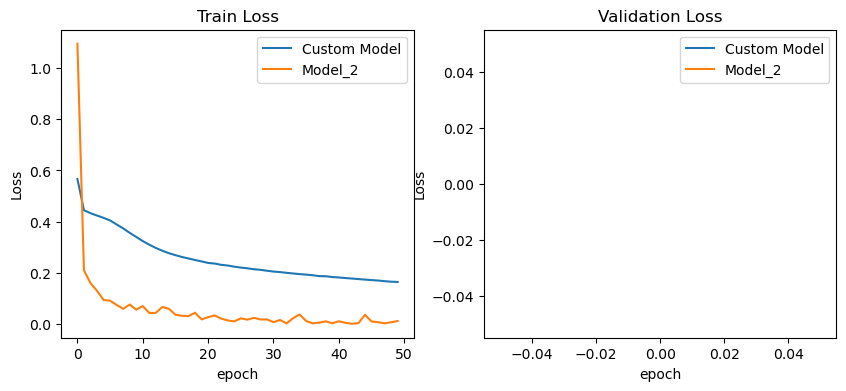

In [65]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history_1.history['accuracy'])
plt.plot(history_2.history['accuracy'])
plt.title('Train accuracy'); plt.ylabel('Accuracy'); plt.xlabel('epoch')
plt.legend(['Custom Model', 'Model_2'], loc='lower right')

plt.subplot(1,2,2)
plt.plot(history_1.history['val_accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Validation accuracy'); plt.ylabel('Accuracy'); plt.xlabel('epoch')
plt.legend(['Custom Model', 'Model_2'], loc='lower right')
plt.show()

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history_1.history['loss'])
plt.plot(history_2.history['loss'])
plt.title('Train Loss'); plt.ylabel('Loss'); plt.xlabel('epoch')
plt.legend(['Custom Model', 'Model_2'], loc='upper right')

plt.subplot(1,2,2)
plt.plot(history_1.history['val_loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Validation Loss'); plt.ylabel('Loss'); plt.xlabel('epoch')
plt.legend(['Custom Model', 'Model_2'], loc='upper right')
plt.show()